# <center>Đồ án 3: Linear Regression</center>

# Thông tin sinh viên

- Họ và tên: Nguyễn Thế Hiển
- MSSV: 22127107
- Lớp: 22CLC08

# Import

In [2]:
import pandas as pd
import numpy as np

# Import thêm dữ thư viện nếu cần
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import KFold

from tabulate import tabulate
from sklearn.preprocessing import PolynomialFeatures

# Đọc dữ liệu

In [3]:
# Đọc dữ liệu bằng pandas
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Lấy các đặc trưng X và giá trị mục tiêu y cho các tập huấn luyện (train) và kiểm tra (test)
X_train = train.iloc[:, :-1]    # Dataframe (chứa 5 đặc trưng huấn luyện)
y_train = train.iloc[:, -1]     # Series    (chứa 1 giá trị mục tiêu huấn luyện)

X_test = test.iloc[:, :-1]      # Dataframe (chứa 5 đặc trưng kiểm tra)
y_test = test.iloc[:, -1]       # Series    (chứa 1 giá trị mục tiêu kiểm tra)

# Sinh viên có thể sử dụng các khác nếu cần

# Cài đặt hàm

In [6]:
# Cài đặt các hàm cần thiết ở đây


*Chú thích: Cần có docstrings cho các hàm.*

# Yêu cầu 1: Phân tích khám phá dữ liệu (1 điểm)

Thống kê cơ bản của tập huấn luyện:
       Hours Studied  Previous Scores  Extracurricular Activities  \
count    9000.000000      9000.000000                 9000.000000   
mean        4.976444        69.396111                    0.493667   
std         2.594647        17.369957                    0.499988   
min         1.000000        40.000000                    0.000000   
25%         3.000000        54.000000                    0.000000   
50%         5.000000        69.000000                    0.000000   
75%         7.000000        85.000000                    1.000000   
max         9.000000        99.000000                    1.000000   

       Sleep Hours  Sample Question Papers Practiced  Performance Index  
count  9000.000000                       9000.000000        9000.000000  
mean      6.535556                          4.590889          55.136333  
std       1.695533                          2.864570          19.187669  
min       4.000000                          0.

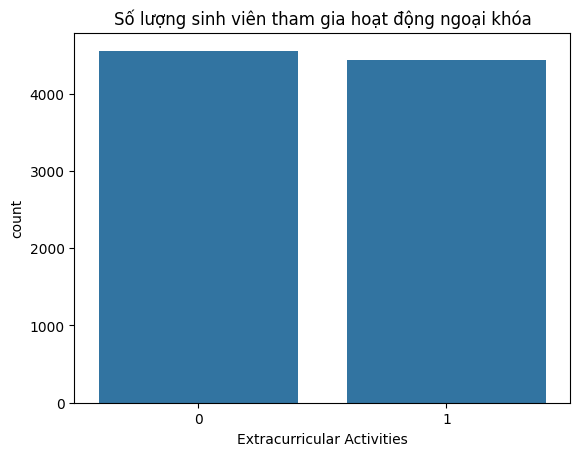

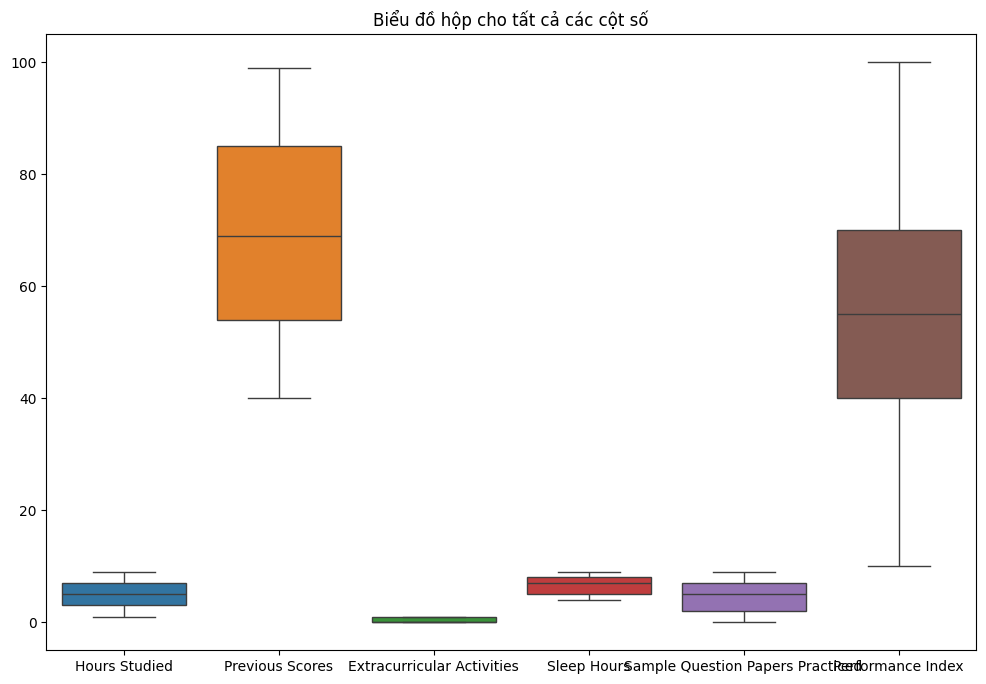

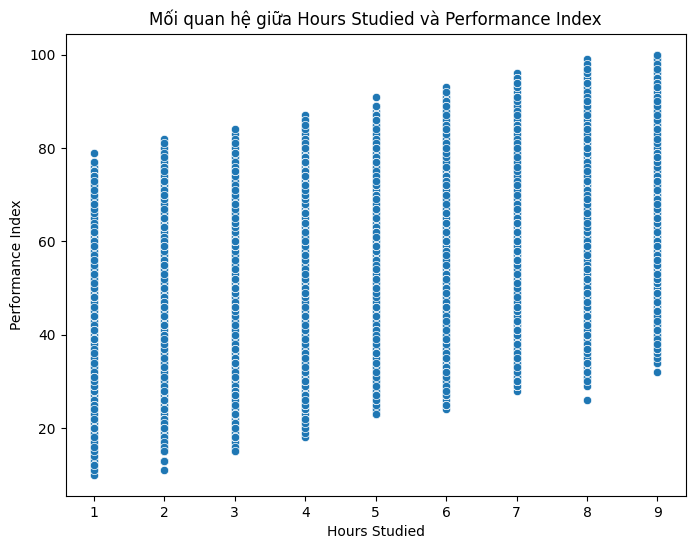

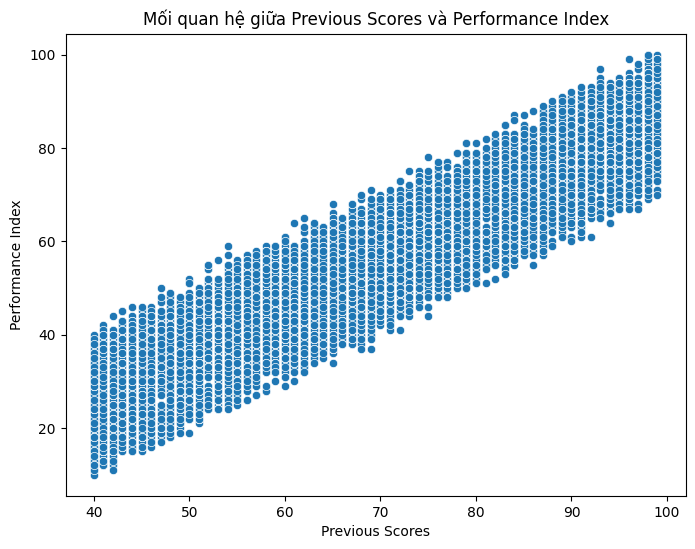

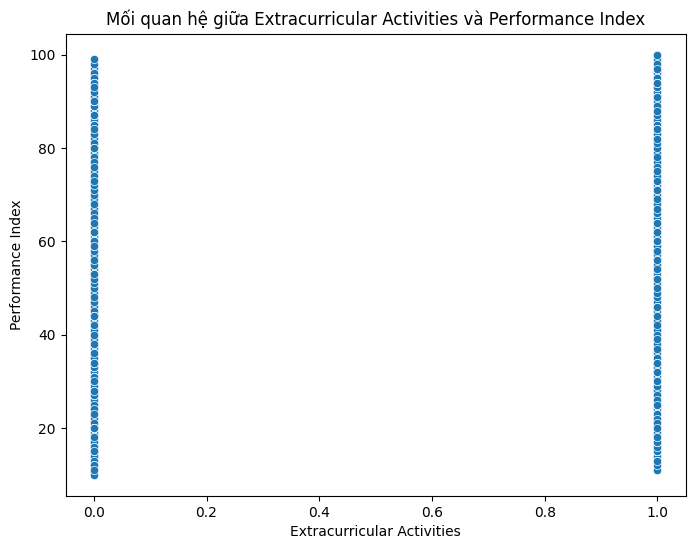

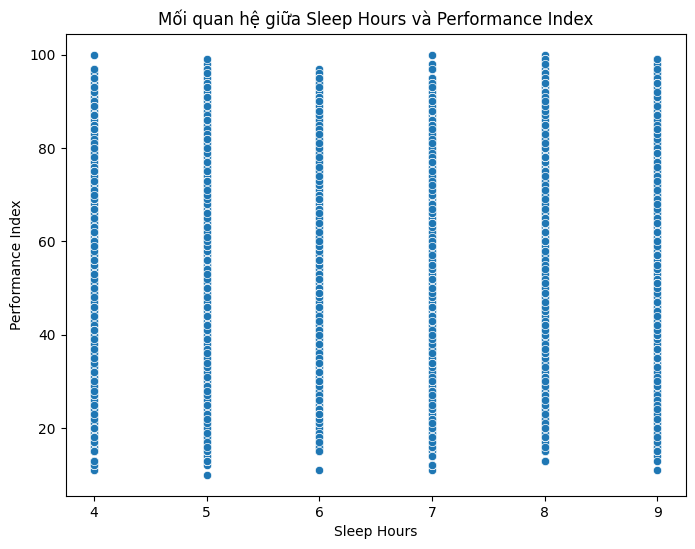

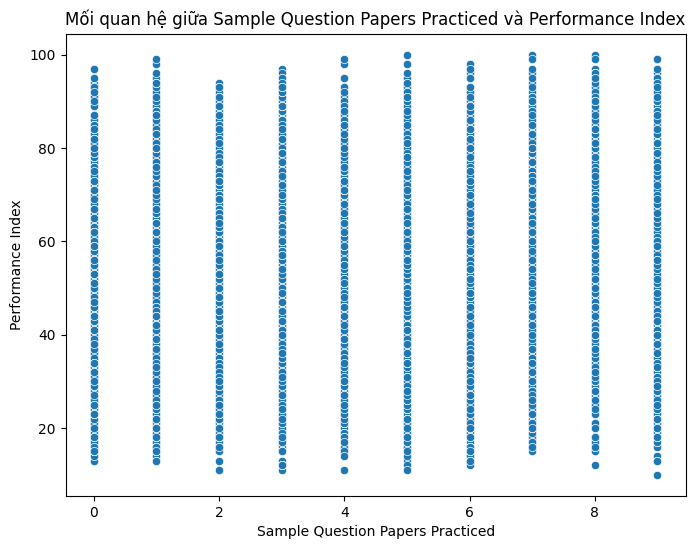

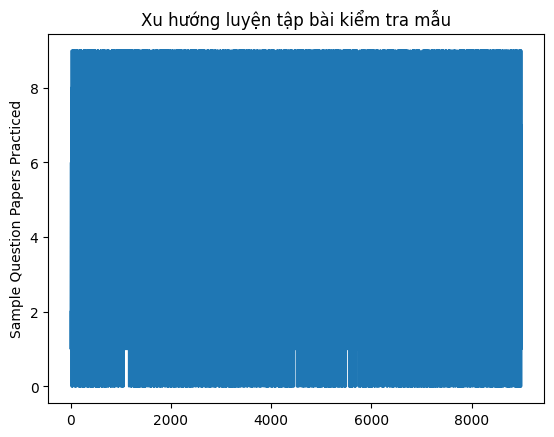

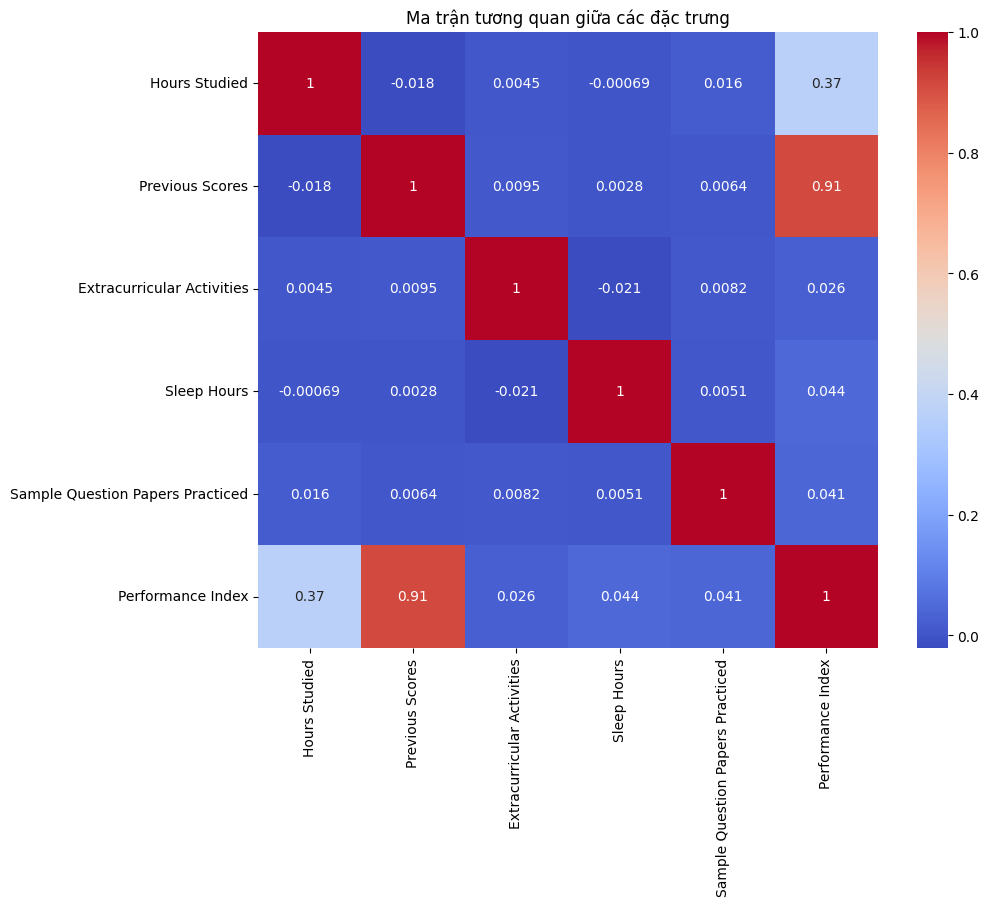

In [4]:
# Phân tích khám phá dữ liệu thông qua thống kê và các biểu đồ
# Chỉ được phân tích trên tập huấn luyện
# Hiển thị thống kê cơ bản của dữ liệu huấn luyện
print("Thống kê cơ bản của tập huấn luyện:")
print(train.describe())

# Kiểm tra thông tin dữ liệu
print("\nThông tin về dữ liệu huấn luyện:")
print(train.info())

# Kiểm tra giá trị null trong dữ liệu
print("\nKiểm tra giá trị null trong tập huấn luyện:")
print(train.isnull().sum())

# Biểu đồ cột cho Extracurricular Activities
sns.countplot(x='Extracurricular Activities', data=train)
plt.title('Số lượng sinh viên tham gia hoạt động ngoại khóa')
plt.show()

# Biểu đồ hộp cho tất cả các cột số
plt.figure(figsize=(12, 8))
sns.boxplot(data=train)
plt.title('Biểu đồ hộp cho tất cả các cột số')
plt.show()

# Biểu đồ tán xạ cho từng đặc trưng với Performance Index
features = train.columns[:-1]  # Lấy tất cả các cột trừ cột cuối cùng (Performance Index)
for feature in features:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=feature, y='Performance Index', data=train)
    plt.title(f'Mối quan hệ giữa {feature} và Performance Index')
    plt.show()
    
# Biểu đồ đường cho Sample Question Papers Practiced
sns.lineplot(data=train['Sample Question Papers Practiced'])
plt.title('Xu hướng luyện tập bài kiểm tra mẫu')
plt.show()

# Bản đồ nhiệt cho mối tương quan giữa các đặc trưng
plt.figure(figsize=(10, 8))
sns.heatmap(train.corr(), annot=True, cmap='coolwarm')
plt.title('Ma trận tương quan giữa các đặc trưng')
plt.show()

# Yêu cầu 2a: Xây dựng mô hình sử dụng toàn bộ 5 đặc trưng đề bài cung cấp (2 điểm) 

In [5]:
# Phần code cho yêu cầu 2a
# Khởi tạo và huấn luyện mô hình hồi quy tuyến tính
model = LinearRegression()
model.fit(X_train, y_train)

# Dự đoán giá trị mục tiêu trên tập kiểm tra
y_pred = model.predict(X_test)

# Tính toán lỗi trung bình tuyệt đối (Mean Absolute Error)
mae = mean_absolute_error(y_test, y_pred)

# Lấy các hệ số hồi quy (regression coefficients) và intercept của mô hình
model_coefficients = model.coef_
intercept = model.intercept_

# In ra các trọng số của các đặc trưng
print("Feature Weights:")
for feature, coef in zip(X_train.columns, model_coefficients):
    print(f"{feature}: {round(coef, 3)}")

# In ra công thức hồi quy với phần trọng số làm tròn đến 3 chữ số thập phân
formula = "Student Performance = " + f"{round(intercept, 3)} + " + " + ".join(
    [f"{round(coef, 3)} * {feature}" for feature, coef in zip(X_train.columns, model_coefficients)]
)

print("\nRegression Equation:")
print(formula)

Feature Weights:
Hours Studied: 2.852
Previous Scores: 1.018
Extracurricular Activities: 0.604
Sleep Hours: 0.474
Sample Question Papers Practiced: 0.192

Regression Equation:
Student Performance = -33.969 + 2.852 * Hours Studied + 1.018 * Previous Scores + 0.604 * Extracurricular Activities + 0.474 * Sleep Hours + 0.192 * Sample Question Papers Practiced


In [6]:
# Gọi hàm MAE (tự cài đặt hoặc từ thư viện) trên tập kiểm tra
print(f"Mean Absolute Error (MAE): {mae:.3f}")

Mean Absolute Error (MAE): 1.596


Công thức hồi quy, phần trọng số làm tròn đến 3 chữ số thập phân, ví dụ 0.012345 $\to$ 0.012

$$\text{Student Performance} = ...$$

# Yêu cầu 2b: Xây dựng mô hình sử dụng duy nhất 1 đặc trưng, tìm mô hình cho kết quả tốt nhất (2 điểm)

Lưu ý: Khi sử dụng cross-validation, sinh viên cần xáo trộn dữ liệu 1 lần duy nhất và thực hiện trên toàn bộ đặc trưng

In [7]:
# Xáo trộn ngẫu nhiên index của dữ liệu (Shuffle data once)
np.random.seed(42)  # Đặt seed để kết quả có thể tái lập
shuffled_indices = np.random.permutation(len(train))
train = train.iloc[shuffled_indices].reset_index(drop=True)

#  Thiết lập số lượng fold (k = 5)
kf = KFold(n_splits=5)

#  Danh sách các đặc trưng để kiểm tra
features = ['Hours Studied', 'Previous Scores', 'Extracurricular Activities', 'Sleep Hours', 'Sample Question Papers Practiced']
mae_results = []
# Phần code cho yêu cầu 2b
# Tìm ra đặc trưng tốt nhất (trong 5 đặc trưng)
for feature in features:
    mae_list = []
    
    # # Vòng lặp qua từng fold
    for train_index, val_index in kf.split(train):
        # Tách tập huấn luyện và tập kiểm tra cho fold hiện tại
        X_train_fold = train.iloc[train_index][[feature]]
        y_train_fold = train.iloc[train_index]['Performance Index']
        X_val_fold = train.iloc[val_index][[feature]]
        y_val_fold = train.iloc[val_index]['Performance Index']
        
        # Khởi tạo và huấn luyện mô hình hồi quy
        model = LinearRegression()
        model.fit(X_train_fold, y_train_fold)
        
        # Dự đoán và tính toán MAE
        y_pred_fold = model.predict(X_val_fold)
        mae = mean_absolute_error(y_val_fold, y_pred_fold)
        mae_list.append(mae)
    
    # Tính MAE trung bình cho đặc trưng này
    mean_mae = np.mean(mae_list)
    mae_results.append((feature, mean_mae))

#  In ra các kết quả cross-validation như yêu cầu
table = [["1", "Hours Studied", f"{mae_results[0][1]:.4f}"],
         ["2", "Previous Scores", f"{mae_results[1][1]:.4f}"],
         ["3", "Extracurricular Activities", f"{mae_results[2][1]:.4f}"],
         ["4", "Sleep Hours", f"{mae_results[3][1]:.4f}"],
         ["5", "Sample Question Papers Practiced", f"{mae_results[4][1]:.4f}"]]

print(tabulate(table, headers=["STT", "Mô hình với 1 đặc trưng", "MAE"], tablefmt="pipe"))


|   STT | Mô hình với 1 đặc trưng          |     MAE |
|------:|:---------------------------------|--------:|
|     1 | Hours Studied                    | 15.4486 |
|     2 | Previous Scores                  |  6.6182 |
|     3 | Extracurricular Activities       | 16.1959 |
|     4 | Sleep Hours                      | 16.187  |
|     5 | Sample Question Papers Practiced | 16.1884 |


In [8]:
# Huấn luyện lại mô hình best_feature_model với đặc trưng tốt nhất trên toàn bộ tập huấn luyện
#  Chọn đặc trưng tốt nhất dựa trên MAE nhỏ nhất
best_feature, best_mae = min(mae_results, key=lambda x: x[1])

# # Huấn luyện lại mô hình best_feature_model với đặc trưng tốt nhất trên toàn bộ tập huấn luyện
X_train_best = train[[best_feature]]
y_train_best = train['Performance Index']

best_model = LinearRegression()
best_model.fit(X_train_best, y_train_best)

# # Công thức hồi quy với đặc trưng tốt nhất
intercept_best = best_model.intercept_
coef_best = best_model.coef_[0]
print(f"\nMô hình hồi quy tốt nhất dựa trên đặc trưng: {best_feature}")
print(f"Performance Index = {intercept_best:.2f} + {coef_best:.2f} * {best_feature}")


Mô hình hồi quy tốt nhất dựa trên đặc trưng: Previous Scores
Performance Index = -14.99 + 1.01 * Previous Scores


In [9]:
# Gọi hàm MAE (tự cài đặt hoặc từ thư viện) trên tập kiểm tra với mô hình best_feature_model
test = pd.read_csv('test.csv')
X_test_best = test[[best_feature]]
y_test_best = test['Performance Index']

y_pred_test_best = best_model.predict(X_test_best)

# Tính toán MAE trên tập kiểm tra
test_mae = mean_absolute_error(y_test_best, y_pred_test_best)
print(f"\nKết quả trên tập kiểm tra với mô hình tốt nhất: MAE = {test_mae:.4f}")


Kết quả trên tập kiểm tra với mô hình tốt nhất: MAE = 6.5443


Công thức hồi quy (dựa trên mô hình đặc trưng tốt nhất), phần trọng số làm tròn đến 3 chữ số thập phân, ví dụ 0.012345 $\to$ 0.012

$$\text{Student Performance} = ...$$

# Yêu cầu 2c: Sinh viên tự xây dựng/thiết kế mô hình, tìm mô hình cho kết quả tốt nhất (2 điểm)

## Xây dựng/Thiết kế mô hình

In [10]:
# Trình bày toàn bộ code liên quan đến việc thiết kế mô hình
# Xáo trộn ngẫu nhiên index của dữ liệu (Shuffle data once)
np.random.seed(42)  # Đặt seed để kết quả có thể tái lập
shuffled_indices = np.random.permutation(len(train))
train = train.iloc[shuffled_indices].reset_index(drop=True)

# Thiết lập số lượng fold (k = 5)
kf = KFold(n_splits=5)

# Định nghĩa các mô hình (tối thiểu 3 mô hình khác nhau)
models = {
    "Sử dụng 2 đặc trưng (Hours Studied, Previous Scores)": ['Hours Studied', 'Previous Scores'],
    "Sử dụng 3 đặc trưng (Hours Studied, Previous Scores, Sleep Hours)": ['Hours Studied', 'Previous Scores', 'Sleep Hours'],
    "Sử dụng đặc trưng tạo mới (Previous Scores^2 + Sleep Hours^2)": 'poly2',
    "Sử dụng nhân của 2 đặc trưng (Hours Studied * Previous Scores)": 'interaction'
}

mae_results = []

## Tìm mô hình cho kết quả tốt nhất

Lưu ý: Khi sử dụng cross-validation, sinh viên cần xáo trộn dữ liệu 1 lần duy nhất và thực hiện trên toàn bộ $m$ mô hình mà sinh viên thiết kế

In [11]:
# Phần code cho yêu cầu 2c
# Tìm ra mô hình tốt nhất (trong m mô hình mà sinh viên tự thiết kế)
# In ra các kết quả cross-validation như yêu cầu
for model_name, features in models.items():
    mae_list = []
    
    for train_index, val_index in kf.split(train):
        if features == 'poly2':
            # Tạo đặc trưng mới bằng cách bình phương Previous Scores và Sleep Hours, sau đó cộng lại
            poly = PolynomialFeatures(degree=2, include_bias=False)
            X_train_poly = poly.fit_transform(train.iloc[train_index][['Previous Scores', 'Sleep Hours']])
            X_val_poly = poly.transform(train.iloc[val_index][['Previous Scores', 'Sleep Hours']])
            y_train_fold = train.iloc[train_index]['Performance Index']
            y_val_fold = train.iloc[val_index]['Performance Index']
            
            model = LinearRegression()
            model.fit(X_train_poly, y_train_fold)
            y_pred_fold = model.predict(X_val_poly)
            
        elif features == 'interaction':
            # Tạo đặc trưng mới bằng cách nhân Hours Studied với Previous Scores
            X_train_interaction = train.iloc[train_index]['Hours Studied'] * train.iloc[train_index]['Previous Scores']
            X_val_interaction = train.iloc[val_index]['Hours Studied'] * train.iloc[val_index]['Previous Scores']
            y_train_fold = train.iloc[train_index]['Performance Index']
            y_val_fold = train.iloc[val_index]['Performance Index']
            
            model = LinearRegression()
            model.fit(X_train_interaction.values.reshape(-1, 1), y_train_fold)
            y_pred_fold = model.predict(X_val_interaction.values.reshape(-1, 1))
        
        else:
            # Sử dụng các đặc trưng thông thường
            X_train_fold = train.iloc[train_index][features]
            y_train_fold = train.iloc[train_index]['Performance Index']
            X_val_fold = train.iloc[val_index][features]
            y_val_fold = train.iloc[val_index]['Performance Index']
            
            model = LinearRegression()
            model.fit(X_train_fold, y_train_fold)
            y_pred_fold = model.predict(X_val_fold)
        
        # Tính toán MAE
        mae = mean_absolute_error(y_val_fold, y_pred_fold)
        mae_list.append(mae)
    
    mean_mae = np.mean(mae_list)
    mae_results.append((model_name, mean_mae))

# In kết quả MAE cho từng mô hình
print("Kết quả MAE cho từng mô hình:")
table = [[i+1, name, f"{mae:.4f}"] for i, (name, mae) in enumerate(mae_results)]
print(tabulate(table, headers=["STT", "Mô hình", "MAE"], tablefmt="pipe"))
# Chọn mô hình tốt nhất
best_model_name, best_mae = min(mae_results, key=lambda x: x[1])


Kết quả MAE cho từng mô hình:
|   STT | Mô hình                                                           |     MAE |
|------:|:------------------------------------------------------------------|--------:|
|     1 | Sử dụng 2 đặc trưng (Hours Studied, Previous Scores)              |  1.8159 |
|     2 | Sử dụng 3 đặc trưng (Hours Studied, Previous Scores, Sleep Hours) |  1.7015 |
|     3 | Sử dụng đặc trưng tạo mới (Previous Scores^2 + Sleep Hours^2)     |  6.6005 |
|     4 | Sử dụng nhân của 2 đặc trưng (Hours Studied * Previous Scores)    | 11.0818 |


In [12]:
# Huấn luyện lại mô hình my_best_model trên toàn bộ tập huấn luyện
if models[best_model_name] == 'poly2':
    X_train_poly = poly.fit_transform(train[['Previous Scores', 'Sleep Hours']])
    my_best_model = LinearRegression()
    my_best_model.fit(X_train_poly, train['Performance Index'])
    # Lấy hệ số hồi quy và intercept
    coefficients = my_best_model.coef_
    intercept = my_best_model.intercept_
    formula = f"Student Performance = {round(intercept, 3)} + {round(coefficients[0], 3)} * Previous Scores^2 + {round(coefficients[1], 3)} * Sleep Hours^2"
elif models[best_model_name] == 'interaction':
    X_train_interaction = train['Hours Studied'] * train['Previous Scores']
    my_best_model = LinearRegression()
    my_best_model.fit(X_train_interaction.values.reshape(-1, 1), train['Performance Index'])
    # Lấy hệ số hồi quy và intercept
    coefficients = my_best_model.coef_
    intercept = my_best_model.intercept_
    formula = f"Student Performance = {round(intercept, 3)} + {round(coefficients[0], 3)} * (Hours Studied * Previous Scores)"
else:
    X_train_best = train[models[best_model_name]]
    my_best_model = LinearRegression()
    my_best_model.fit(X_train_best, train['Performance Index'])
    # Lấy hệ số hồi quy và intercept
    coefficients = my_best_model.coef_
    intercept = my_best_model.intercept_
    terms = " + ".join([f"{round(coeff, 3)} * {feature}" for coeff, feature in zip(coefficients, models[best_model_name])])
    formula = f"Student Performance = {round(intercept, 3)} + {terms}"

# In công thức hồi quy của mô hình tốt nhất
print("\nCông thức hồi quy của mô hình tốt nhất:")
print(formula)


Công thức hồi quy của mô hình tốt nhất:
Student Performance = -32.82 + 2.856 * Hours Studied + 1.018 * Previous Scores + 0.472 * Sleep Hours


In [13]:
# Gọi hàm MAE (tự cài đặt hoặc từ thư viện) trên tập kiểm tra với mô hình my_best_model
test = pd.read_csv('test.csv')

if models[best_model_name] == 'poly2':
    X_test_poly = poly.transform(test[['Previous Scores', 'Sleep Hours']])
    y_pred_test_best = my_best_model.predict(X_test_poly)
elif models[best_model_name] == 'interaction':
    X_test_interaction = test['Hours Studied'] * test['Previous Scores']
    y_pred_test_best = my_best_model.predict(X_test_interaction.values.reshape(-1, 1))
else:
    X_test_best = test[models[best_model_name]]
    y_pred_test_best = my_best_model.predict(X_test_best)

# Tính toán MAE trên tập kiểm tra
test_mae = mean_absolute_error(test['Performance Index'], y_pred_test_best)
print(f"Kết quả trên tập kiểm tra với mô hình tốt nhất: MAE = {test_mae:.4f}")

Kết quả trên tập kiểm tra với mô hình tốt nhất: MAE = 1.6943


Công thức hồi quy (dựa trên mô hình tốt nhất mà sinh viên tự xây dựng/thiết kế), phần trọng số làm tròn đến 3 chữ số thập phân, ví dụ 0.012345 $\to$ 0.012

$$\text{Student Performance} = ...$$